In [1]:
url="https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(url, "seattle.bicycle.csv")

('seattle.bicycle.csv', <http.client.HTTPMessage at 0x1c251601f0>)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("seattle.bicycle.csv",parse_dates=True)

In [5]:
df.head(3)

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139958 entries, 0 to 139957
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          139958 non-null  object 
 1   Fremont Bridge Total          139937 non-null  float64
 2   Fremont Bridge East Sidewalk  139937 non-null  float64
 3   Fremont Bridge West Sidewalk  139937 non-null  float64
dtypes: float64(3), object(1)
memory usage: 4.3+ MB


In [7]:
df.shape

(139958, 4)

In [8]:
# rename column names
df.rename({"Date":"date","Fremont Bridge Total":"total","Fremont Bridge East Sidewalk":"east","Fremont Bridge West Sidewalk":"west"},axis=1,inplace=True)

In [9]:
# count of each department
df.head(3)

,date,total,east,west
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0


In [10]:

df['date']=pd.to_datetime(df["date"])

In [11]:
# get year  and month column
df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139958 entries, 0 to 139957
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    139958 non-null  datetime64[ns]
 1   total   139937 non-null  float64       
 2   east    139937 non-null  float64       
 3   west    139937 non-null  float64       
 4   year    139958 non-null  int64         
 5   month   139958 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 6.4 MB


Text(0.5, 1.0, 'bikes over years')

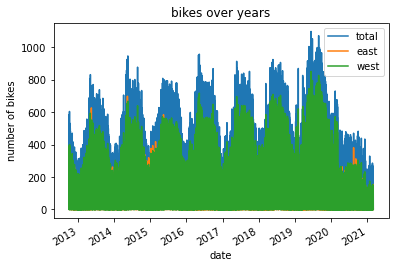

In [13]:
df.plot(x="date",y=["total","east","west"])
plt.xlabel("date")
plt.ylabel("number of bikes")
plt.title("bikes over years")

In [14]:
# group by year in order of total bike
df.groupby("year")["total"].sum().sort_values(ascending=False).head(10)

year
2019    2374292.0
2018    2103760.0
2014    2012392.0
2015    1973112.0
2016    1964940.0
2017    1926270.0
2013    1856558.0
2020    1017972.0
2012     305422.0
2021      65095.0
Name: total, dtype: float64

<ipython-input-15-b4af401ca672>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("year")["total","west","east"].sum().head(10).plot()


Text(0.5, 1.0, 'bikes rented over years')

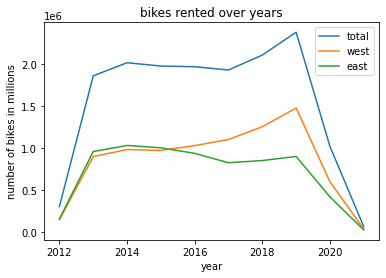

In [15]:
df.groupby("year")["total","west","east"].sum().head(10).plot()
plt.xlabel("year")
plt.ylabel("number of bikes in millions")
plt.title("bikes rented over years")

In [16]:
# group by month in order of total bike
df.groupby("month")["total"].sum().sort_values(ascending=False).head(20)

month
7     1771661.0
5     1707022.0
8     1702713.0
6     1645745.0
9     1395139.0
10    1392231.0
4     1275712.0
3     1090500.0
11    1037420.0
1      950386.0
2      864131.0
12     767153.0
Name: total, dtype: float64

Text(0.5, 1.0, 'bikes per month')

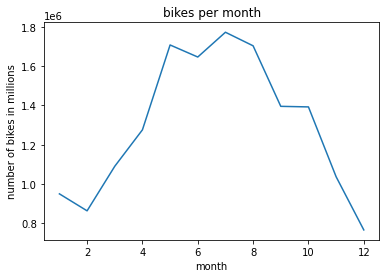

In [17]:
df.groupby("month")["total"].sum().head(12).plot()
plt.xlabel("month")
plt.ylabel("number of bikes in millions")
plt.title("bikes per month")

It makes sense that more bikes were used in Summer months than in Winter months

In [18]:
# group comparison by East and west
print("west total:",df.west.sum())
print("east total:",df.east.sum())

west total: 8493117.0
east total: 7106696.0


More bikes were used in West than in east

In [19]:
# bikes per each week
%matplotlib inline
df["week"]=df["date"].dt.week

<ipython-input-20-9eae05ee32b3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("week")["total","east","west"].sum().plot()


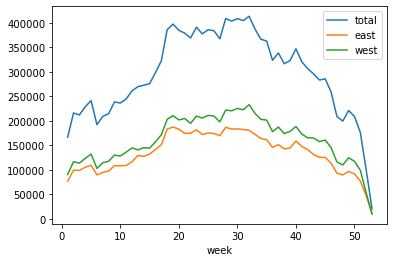

In [20]:
# grouping by week
df.groupby("week")["total","east","west"].sum().plot()

In [21]:
df.set_index("date")

,total,east,west,year,month,week
date,,,,,,
2019-11-01 00:00:00,12.0,7.0,5.0,2019,11,44
2019-11-01 01:00:00,7.0,0.0,7.0,2019,11,44
2019-11-01 02:00:00,1.0,0.0,1.0,2019,11,44
2019-11-01 03:00:00,6.0,6.0,0.0,2019,11,44
2019-11-01 04:00:00,6.0,5.0,1.0,2019,11,44
...,...,...,...,...,...,...
2021-02-28 19:00:00,17.0,3.0,14.0,2021,2,8
2021-02-28 20:00:00,21.0,13.0,8.0,2021,2,8
2021-02-28 21:00:00,18.0,10.0,8.0,2021,2,8


In [22]:
# pivot table for time and date
pivoted=df.pivot_table("total",index=df.date.dt.time,columns=df.date.dt.date)
pivoted.iloc[:5,:5]

date,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
date,,,,,
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


In [23]:
# extract time from date
df["time"]=df["date"].dt.time

<ipython-input-24-ed4c805d26c5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("time")["total","east","west"].sum().plot()


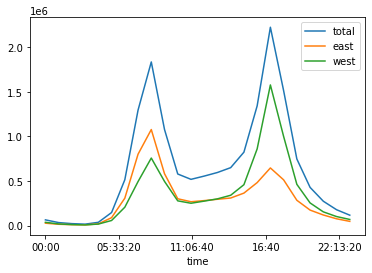

In [24]:
df.groupby("time")["total","east","west"].sum().plot()

It shows that more people ride bike during morning and evening time

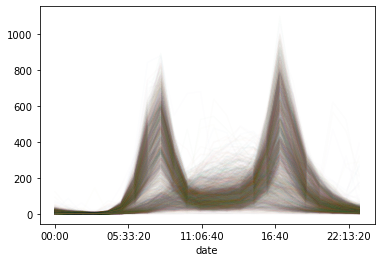

In [25]:
# plotting pivoted
pivoted.plot(legend=False,alpha=0.01)